# Stays by parish


### Question 0:

A preprocessing script places each stay  point  in a  parish. Does it work correctly?

### Question  1:

When Andorra was locked  down, where did people  leave? Where did people  stay? How did this differ by nationality?

Count daily distinct users in  each parish by nationality (MCC).

In [11]:
%config IPCompleter.greedy=True # jupyter autocomplete
%config InlineBackend.figure_format = 'retina'
import datetime
import json
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np
import pandas as pd

import geopandas as gpd


stays_datapath = '../../data/private/stays/'
andorra_parish_shps_filepath = '../../data/public/shapefiles/andorra_parish.shp'


date_fmt = '%Y-%m-%d'

CRS ='epsg:4269'


In [12]:
!ls $stays_datapath

2019_3  2019_5  2020_1  2020_2  2020_4  2020_6  2020_8
2019_4  2019_6  2020_10 2020_3  2020_5  2020_7  2020_9


In [200]:
DATE = 'date'

IMSI = 'imsi'
MCC = 'mcc'
LAT = 'lat'
LON = 'lon'

PARISH_NAME = 'parish'
GEOMETRY = 'geometry'

array(['Andorra la Vella', 'Canillo', 'Encamp', 'Escaldes-Engordany',
       'La Massana', 'Ordino', 'Sant Julià de Lòria'], dtype=object)

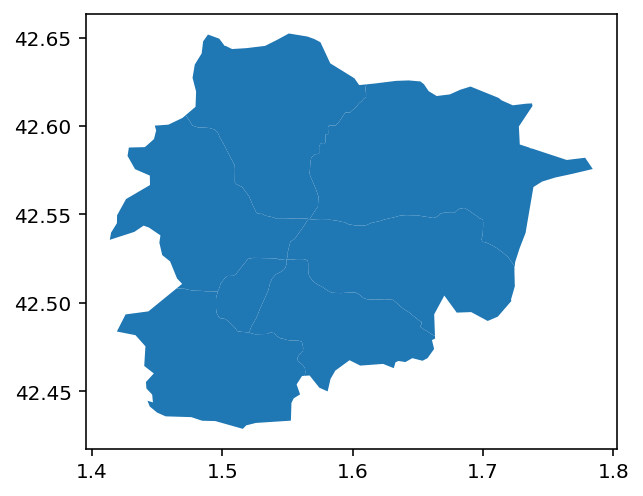

In [201]:
# Read  in the  shapefile
andorra_parish_shps = gpd.read_file(andorra_parish_shps_filepath)
andorra_parish_shps.to_crs(CRS)
andorra_parish_shps.rename(columns={'NAME_1':PARISH_NAME}, inplace=True)
andorra_parish_shps = andorra_parish_shps[[PARISH_NAME, GEOMETRY]]
assert(len(andorra_parish_shps) == 7) # There  are  7 parishes
andorra_parish_shps.plot()
parishes = andorra_parish_shps[PARISH_NAME].values
parishes

In [202]:
def get_stays_filepath(day, month, year=2020):
    return '{}{}_{}/stays_{}_{}_{}.csv'.format(stays_datapath, year, month, year, month, day)

In [203]:
def daterange(start_datetime, end_datetime):
    for n in range(int((end_datetime - start_datetime).days) + 1):
        yield start_datetime + datetime.timedelta(n)
        

In [204]:
start_date = '2020-03-01'
end_date = '2020-07-01'
start_datetime = datetime.datetime.strptime(start_date, date_fmt)
end_datetime  = datetime.datetime.strptime(end_date, date_fmt)
dates = [d for d in daterange(start_datetime, end_datetime)]
# dates

In [205]:
start_date_2019 = '2019-03-01'
end_date_2019 = '2019-07-01'
start_datetime_2019 = datetime.datetime.strptime(start_date_2019, date_fmt)
end_datetime_2019  = datetime.datetime.strptime(end_date_2019, date_fmt)
dates_2019 = [d for d in daterange(start_datetime_2019, end_datetime_2019)]
# dates_2019

### Data checks

Does this look right?

When is parish null? Is it usually for non Andorran users?

Make a table:

date, MCC, total stays, null parishes

In [88]:
TOTAL_STAYS  = 'total stays'
NULL_PARISHES  = 'null parishes'
MCC = 'mcc'

In [270]:
OTHER_MCC = 'other'
ALL_MCC  = 'All'
NON_ANDORRAN = 'Non-Andorran'
ANDORRAN = 'Andorran'
ANDORRAN_MCC = '213'

mcc_names_dict = {
    '213':'Andorran',
    '214':'Spanish',
    '208':'French',
    '234':'British',
    # otherwise nationality is 'other'
    OTHER_MCC: 'Other'
}


In [90]:
mcc_records = []
mccs = list(mcc_names_dict.keys())

for i, d in enumerate(dates):
    stays_filepath = get_stays_filepath(d.day, d.month)
    date_str =  d.strftime("%Y-%m-%d")
    print('%s/%s %s' %  (i, len(dates), date_str))
    df = pd.read_csv(stays_filepath)
    df[MCC] = df[MCC].astype(str)
    mcc_records += [{
        DATE: d,
        MCC: ALL_MCC,
        TOTAL_STAYS: len(df),
        NULL_PARISHES: len(df[df[PARISH_NAME].isnull()])
    }]
    for mcc in mccs:
        mcc_df = df[df[MCC]==mcc]
        if mcc == OTHER_MCC:
            mcc_df = df[~df[MCC].isin(mccs)]
        mcc_records += [{
            DATE: d,
            MCC: mcc,
            TOTAL_STAYS: len(mcc_df),
            NULL_PARISHES: len(mcc_df[mcc_df[PARISH_NAME].isnull()])
        }]
    # handle non-andorran
    mcc_df = df[df[MCC]!=ANDORRAN_MCC]
    mcc_records += [{
            DATE: d,
            MCC: NON_ANDORRAN,
            TOTAL_STAYS: len(mcc_df),
            NULL_PARISHES: len(mcc_df[mcc_df[PARISH_NAME].isnull()])
    }]


0/91 2020-03-02
1/91 2020-03-03
2/91 2020-03-04
3/91 2020-03-05
4/91 2020-03-06
5/91 2020-03-07
6/91 2020-03-08
7/91 2020-03-09
8/91 2020-03-10
9/91 2020-03-11
10/91 2020-03-12
11/91 2020-03-13
12/91 2020-03-14
13/91 2020-03-15
14/91 2020-03-16
15/91 2020-03-17
16/91 2020-03-18
17/91 2020-03-19
18/91 2020-03-20
19/91 2020-03-21
20/91 2020-03-22
21/91 2020-03-23
22/91 2020-03-24
23/91 2020-03-25
24/91 2020-03-26
25/91 2020-03-27
26/91 2020-03-28
27/91 2020-03-29
28/91 2020-03-30
29/91 2020-03-31
30/91 2020-04-01
31/91 2020-04-02
32/91 2020-04-03
33/91 2020-04-04
34/91 2020-04-05
35/91 2020-04-06
36/91 2020-04-07
37/91 2020-04-08
38/91 2020-04-09
39/91 2020-04-10
40/91 2020-04-11
41/91 2020-04-12
42/91 2020-04-13
43/91 2020-04-14
44/91 2020-04-15
45/91 2020-04-16
46/91 2020-04-17
47/91 2020-04-18
48/91 2020-04-19
49/91 2020-04-20
50/91 2020-04-21
51/91 2020-04-22
52/91 2020-04-23
53/91 2020-04-24
54/91 2020-04-25
55/91 2020-04-26
56/91 2020-04-27
57/91 2020-04-28
58/91 2020-04-29
59/91 2

In [91]:
parish_check_df = pd.DataFrame.from_records(mcc_records)
parish_check_df.head(10)

,date,mcc,total stays,null parishes
0,2020-03-02,All,667022,9135
1,2020-03-02,213,485912,2868
2,2020-03-02,214,50633,768
3,2020-03-02,208,63951,3220
4,2020-03-02,234,16396,658
5,2020-03-02,other,50130,1621
6,2020-03-02,Non-Andorran,181110,6267
7,2020-03-03,All,661736,8159
8,2020-03-03,213,495032,2661
9,2020-03-03,214,38800,583


In [92]:
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker

cmap = plt.get_cmap("tab10")

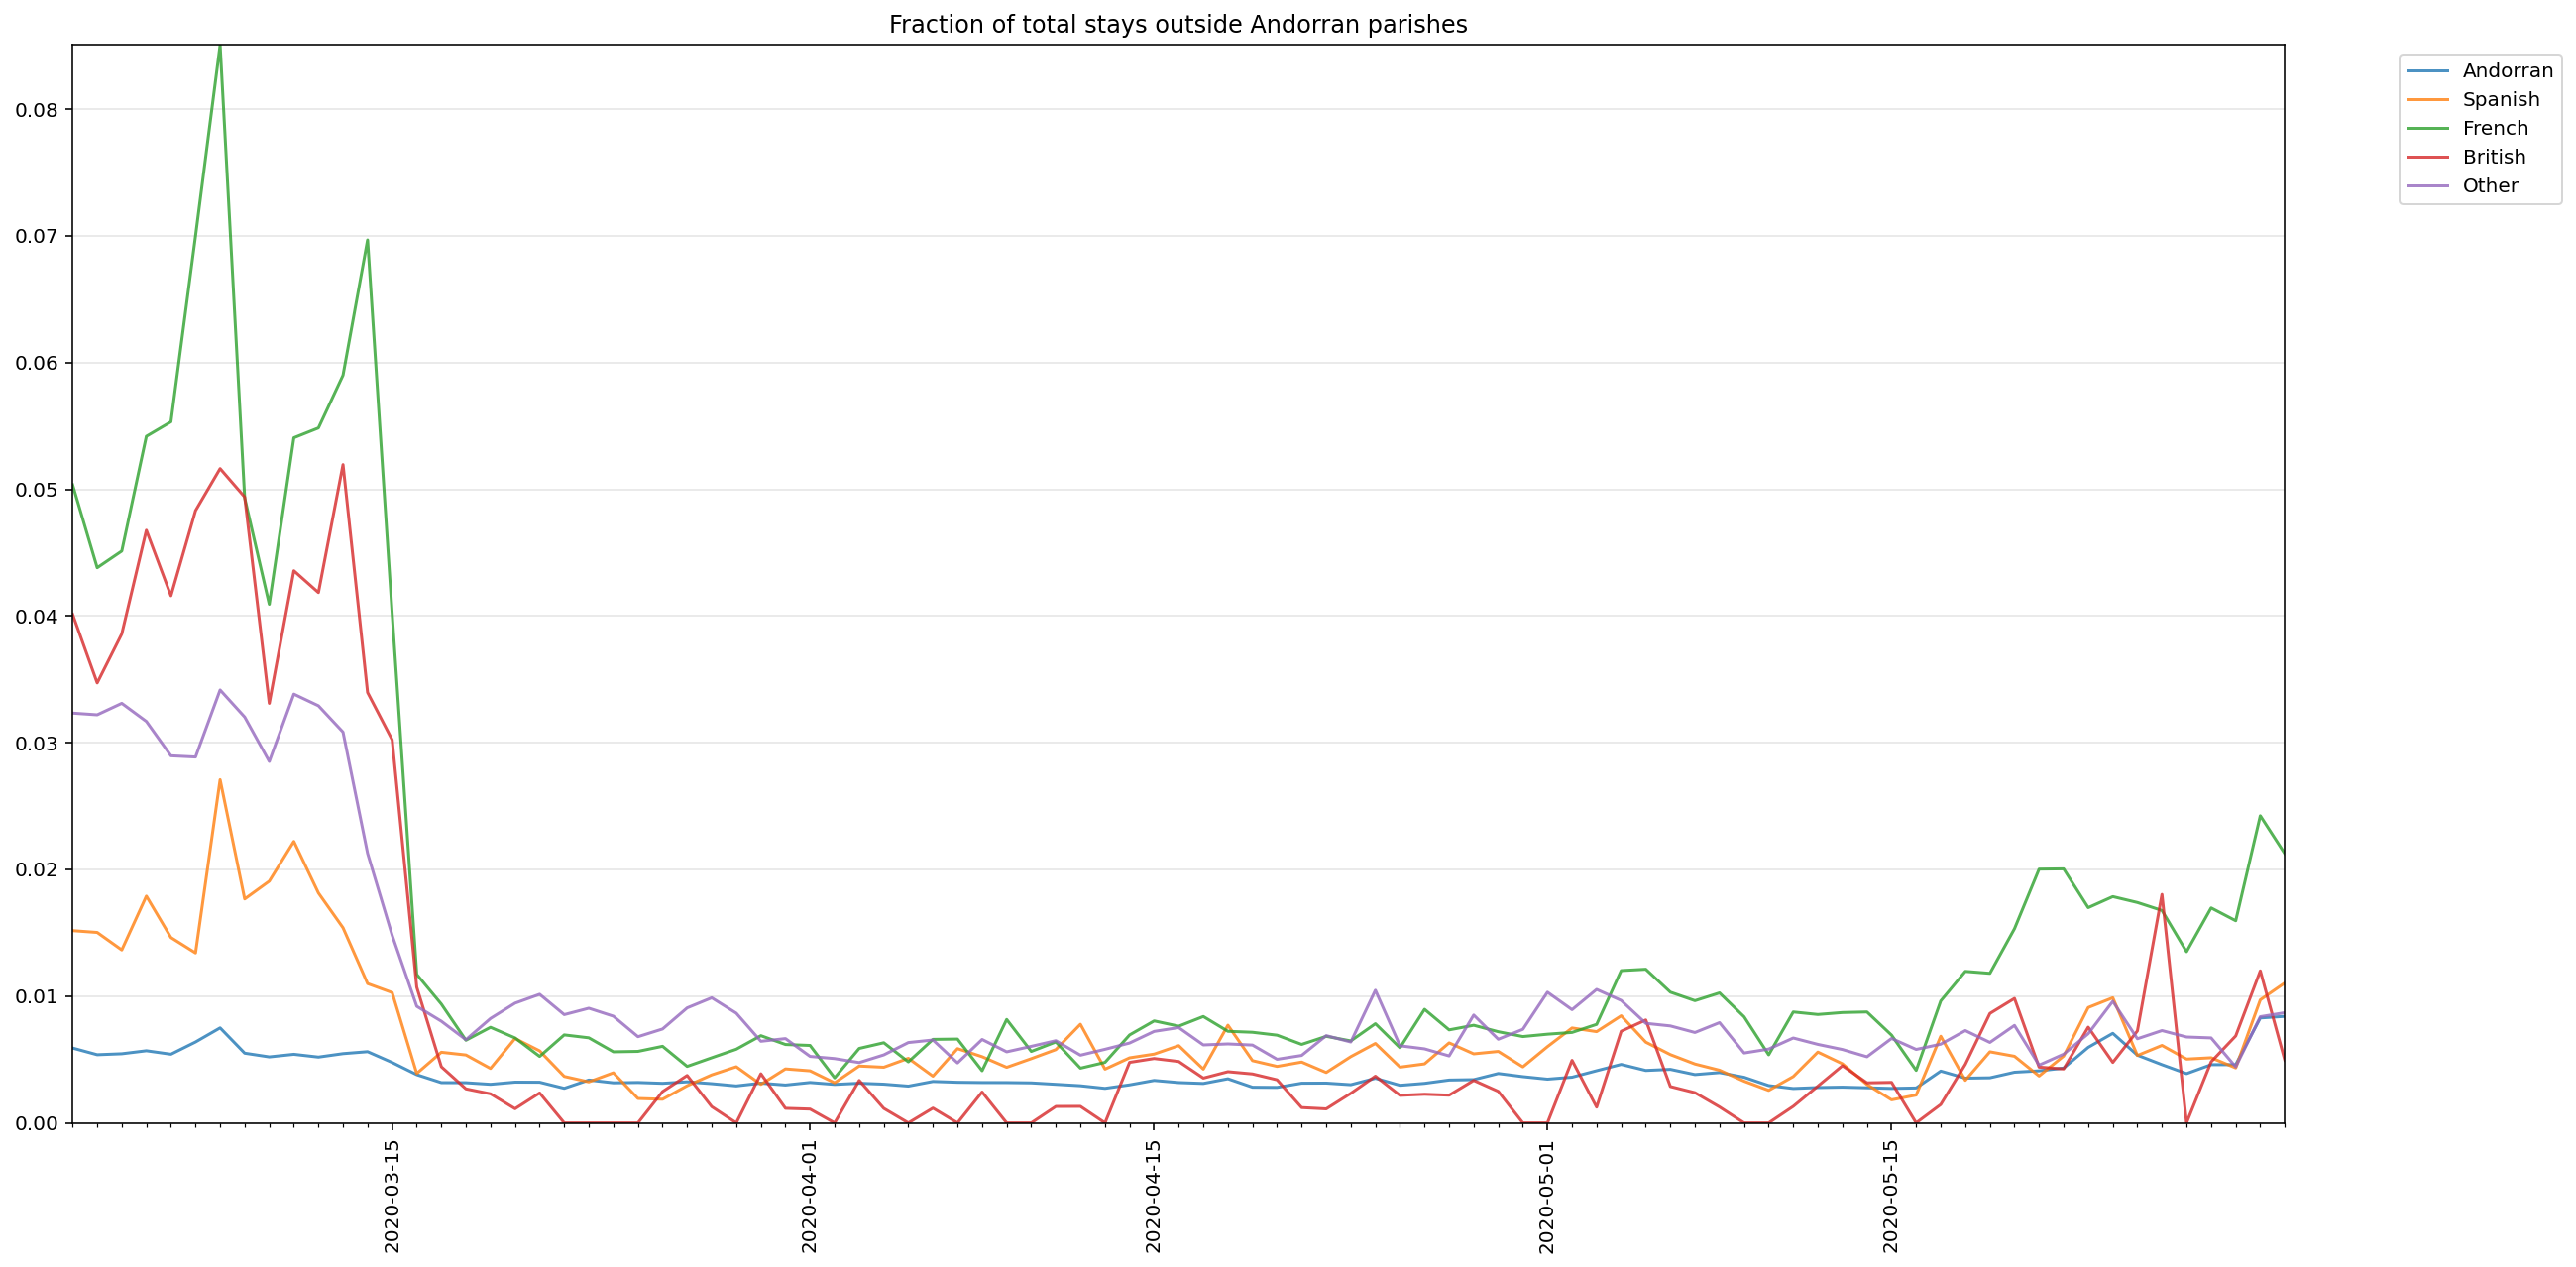

In [93]:
figure, ax = plt.subplots(figsize=(20, 10))

for i, (mcc, name) in enumerate(mcc_names_dict.items()):
    mcc_df = parish_check_df[parish_check_df[MCC]==mcc]
    index = pd.to_datetime(mcc_df[DATE])
    ax.plot(
        index,
        (mcc_df[NULL_PARISHES]/mcc_df[TOTAL_STAYS]).values,
        color=cmap(i),
        label='%s'%(name),
        linestyle='-',
        alpha=0.8,
    )
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.margins(0)
ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
ax.get_figure().set_facecolor('w')
plt.title('Fraction of total stays outside Andorran parishes')
plt.legend(bbox_to_anchor=(1.13, 1), loc='upper right', ncol=1)
plt.xticks(rotation=90)
plt.show()

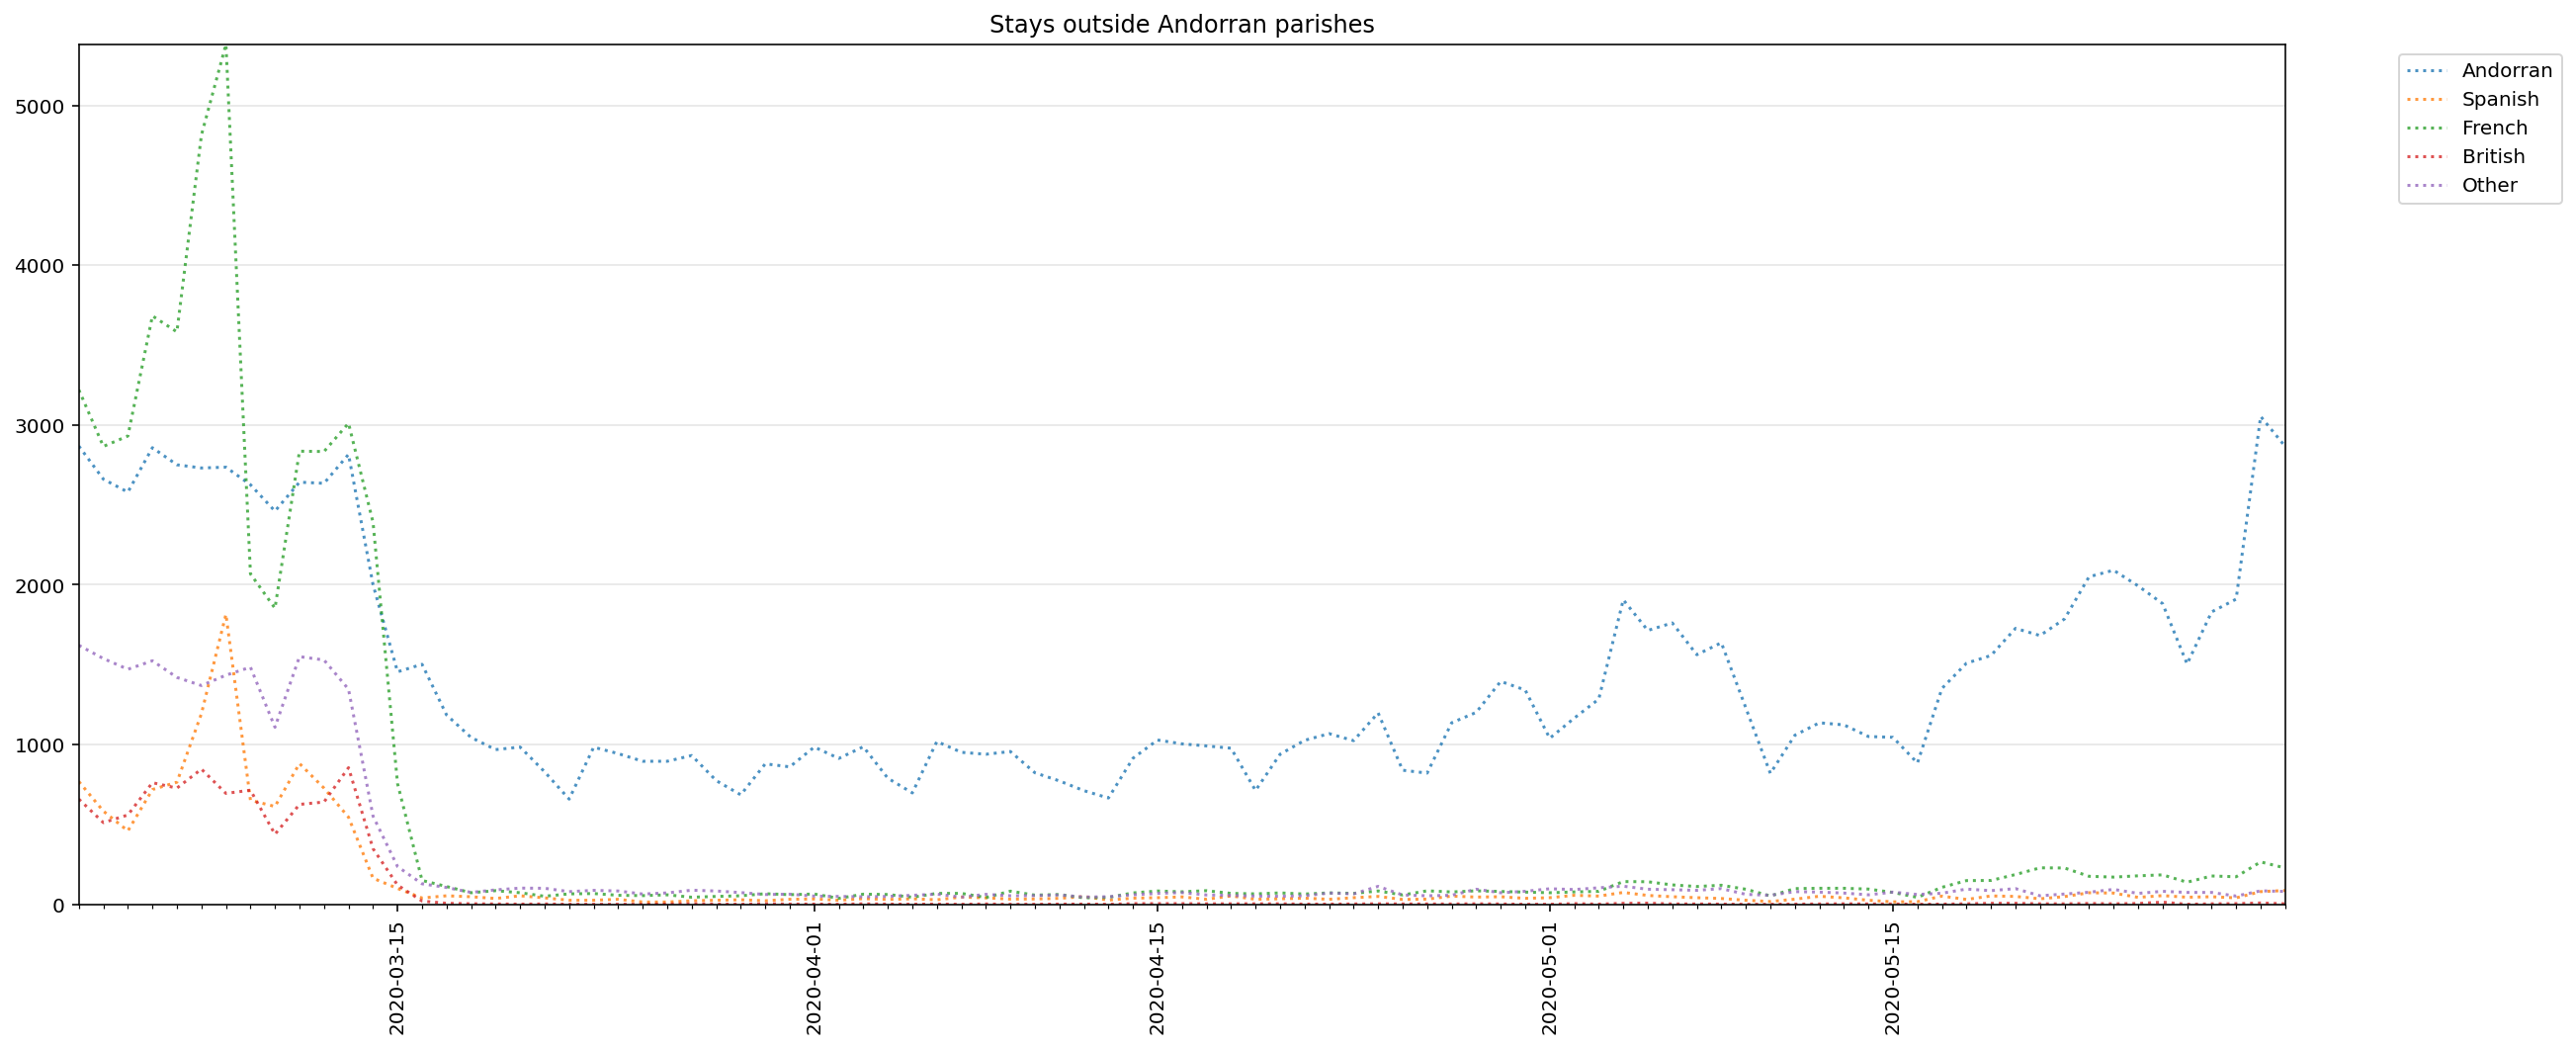

In [94]:
figure, ax = plt.subplots(figsize=(20, 8))

for i, (mcc, name) in enumerate(mcc_names_dict.items()):
    mcc_df = parish_check_df[parish_check_df[MCC]==mcc]
    index = pd.to_datetime(mcc_df[DATE])
    ax.plot(
        index,
        mcc_df[NULL_PARISHES].values,
        color=cmap(i),
        label='%s'%(name),
        linestyle=':',
        alpha=0.8,
    )
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.margins(0)
ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
ax.get_figure().set_facecolor('w')
plt.title('Stays outside Andorran parishes')
plt.legend(bbox_to_anchor=(1.13, 1), loc='upper right', ncol=1)
plt.xticks(rotation=90)
plt.show()

Where do these stays outside parishes occur? It is possible due to the non-convex shape of Andorra.

Look at one (the last day) of processing data.

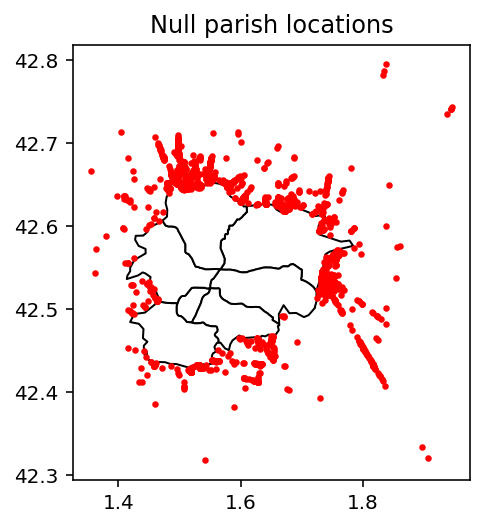

In [96]:
nan_parish_df = df[df[PARISH_NAME].isnull()]
nan_parish_gdf = gpd.GeoDataFrame(nan_parish_df,
                            geometry=gpd.points_from_xy(nan_parish_df[LON], nan_parish_df[LAT]))
nan_parish_gdf.crs = {'init':CRS}

fig, ax = plt.subplots()
# get rid of the garbage points that  keep this from  being  properly plotted
nan_parish_gdf = nan_parish_gdf[(nan_parish_gdf.lon > 1) & (nan_parish_gdf.lon < 2)]
base = andorra_parish_shps.plot(ax=ax, color='white', edgecolor='black')
nan_parish_gdf.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_title('Null parish locations')
plt.show()

Text(0.5, 1.0, 'Data sample with parishes')

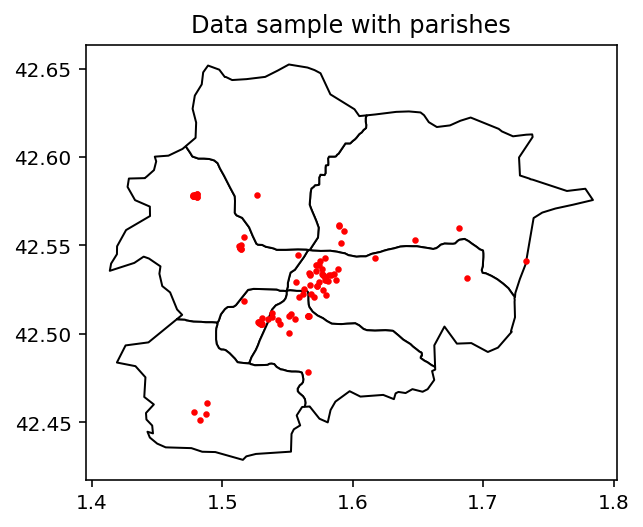

In [98]:
parishes_df = df[~df[PARISH_NAME].isnull()]
parishes_gdf = gpd.GeoDataFrame(parishes_df,
                                geometry=gpd.points_from_xy(parishes_df[LON], parishes_df[LAT]))
parishes_gdf.crs = {'init':CRS}

fig, ax = plt.subplots()
ax.set_aspect('equal')
andorra_parish_shps.plot(ax=ax, color='white', edgecolor='black')
parishes_gdf.head(100).plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Data sample with parishes')

### Daily users with stays  within parish, by  MCC

Make a table

`date, mcc, users, parish`


Data  is for users with at least one stay on the given day in the parish. Users are not double counted for a given day  and  parish.
Users are double counted across  parishes.
i.e. if  they have a stay in  multiple parishes, they increment the count  for  each of those parishes.

In [206]:
USER_COUNT = 'users'
mccs = list(mcc_names_dict.keys())

def get_parish_users_df(dates):
    parish_users_records = []
    missing_dates = []
    for i, d in enumerate(dates):
        stays_filepath = get_stays_filepath(d.day, d.month, d.year)
        date_str =  d.strftime("%Y-%m-%d")
        if i % 10 == 0:
            print('%s/%s %s' %  (i, len(dates), date_str))
        if not Path(stays_filepath).is_file():
            missing_dates += [d]
            print('%s\nfile not found: %s' % (date_str, stays_filepath))
            continue
        df = pd.read_csv(stays_filepath)
        df[MCC] = df[MCC].astype(str)
        for parish in parishes:
            parish_df = df[df[PARISH_NAME]==parish]
            parish_users_records += [{
                    DATE: d,
                    MCC: ALL_MCC,
                    USER_COUNT: parish_df[IMSI].nunique(),
                    PARISH_NAME: parish,
                }]
            for mcc in mccs:
                mcc_parish_df = parish_df[parish_df[MCC]==mcc]
                if mcc == OTHER_MCC:
                    mcc_parish_df = parish_df[~parish_df[MCC].isin(mccs)]

                parish_users_records += [{
                    DATE: d,
                    MCC: mcc,
                    USER_COUNT: mcc_parish_df[IMSI].nunique(),
                    PARISH_NAME: parish,
                }]
            # handle non-andorran
            mcc_parish_df = parish_df[parish_df[MCC]!=ANDORRAN_MCC]
            parish_users_records += [{
                DATE: d,
                MCC:  NON_ANDORRAN,
                USER_COUNT: mcc_parish_df[IMSI].nunique(),
                PARISH_NAME: parish,
            }]
    parish_users_df = pd.DataFrame.from_records(parish_users_records)
    parish_users_df[MCC] = parish_users_df[MCC].astype(str)
    return parish_users_df, missing_dates

In [207]:
parish_users_2020_df, missing_dates = get_parish_users_df(dates)
parish_users_2020_df.head()

0/123 2020-03-01
2020-03-01
file not found: /home/data_commons/andorra_data_2020/stays/2020_3/stays_2020_3_1.csv
10/123 2020-03-11
20/123 2020-03-21
30/123 2020-03-31
40/123 2020-04-10
50/123 2020-04-20
60/123 2020-04-30
70/123 2020-05-10
80/123 2020-05-20
90/123 2020-05-30
100/123 2020-06-09
110/123 2020-06-19
2020-06-28
file not found: /home/data_commons/andorra_data_2020/stays/2020_6/stays_2020_6_28.csv
120/123 2020-06-29
2020-06-29
file not found: /home/data_commons/andorra_data_2020/stays/2020_6/stays_2020_6_29.csv


,date,mcc,users,parish
0,2020-03-02,All,46028,Andorra la Vella
1,2020-03-02,213,35651,Andorra la Vella
2,2020-03-02,214,4632,Andorra la Vella
3,2020-03-02,208,2217,Andorra la Vella
4,2020-03-02,234,195,Andorra la Vella


In [208]:
parish_users_2019_df, missing_dates = get_parish_users_df(dates_2019)

0/123 2019-03-01
2019-03-01
file not found: /home/data_commons/andorra_data_2020/stays/2019_3/stays_2019_3_1.csv
10/123 2019-03-11
20/123 2019-03-21
30/123 2019-03-31
40/123 2019-04-10
50/123 2019-04-20
60/123 2019-04-30
70/123 2019-05-10
80/123 2019-05-20
90/123 2019-05-30
2019-06-07
file not found: /home/data_commons/andorra_data_2020/stays/2019_6/stays_2019_6_7.csv
2019-06-08
file not found: /home/data_commons/andorra_data_2020/stays/2019_6/stays_2019_6_8.csv
100/123 2019-06-09
2019-06-09
file not found: /home/data_commons/andorra_data_2020/stays/2019_6/stays_2019_6_9.csv
2019-06-10
file not found: /home/data_commons/andorra_data_2020/stays/2019_6/stays_2019_6_10.csv
2019-06-11
file not found: /home/data_commons/andorra_data_2020/stays/2019_6/stays_2019_6_11.csv
110/123 2019-06-19
120/123 2019-06-29
2019-07-01
file not found: /home/data_commons/andorra_data_2020/stays/2019_7/stays_2019_7_1.csv


In [209]:
parish_users_2019_df.head()

,date,mcc,users,parish
0,2019-03-02,All,56157,Andorra la Vella
1,2019-03-02,213,31568,Andorra la Vella
2,2019-03-02,214,15064,Andorra la Vella
3,2019-03-02,208,3697,Andorra la Vella
4,2019-03-02,234,385,Andorra la Vella


In [210]:
import matplotlib as mpl

COLOR = 'black'
def set_colors(color=COLOR):
    mpl.rcParams['text.color'] = color
    mpl.rcParams['axes.labelcolor'] = color
    mpl.rcParams['xtick.color'] = color
    mpl.rcParams['ytick.color'] = color
    # transparent background
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # red   with alpha = 30%
        "axes.facecolor":    (1.0, 1.0, 1.0, 0.0),  # green with alpha = 50%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # blue  with alpha = 20%
    })

In [211]:
cmap = plt.get_cmap("tab10")
parish_cmap = {sorted(parishes)[i]:cmap(i) for i in range(len(parishes))}

In [224]:
myFmt = mdates.DateFormatter('%b %d')

In [248]:
def plot_parish_mcc(df, mcc_names_dict, year, legend=True):
    """
    Make plots for  each MCC
    """
    nrows =len(mcc_names_dict)
    fig, axes = plt.subplots(nrows, 1, figsize=(15, nrows*8),
                             sharey=True)
    plt.subplots_adjust(hspace=0.15)
    
    for i, (mcc, name) in enumerate(mcc_names_dict.items()):
        mcc_df = df[df[MCC]==mcc]
        ax = axes.flat[i]
        bottom = None
        for parish in parishes:
            p_df = mcc_df[mcc_df[PARISH_NAME]==parish]
            p_df = p_df.set_index(DATE)
            users = p_df[USER_COUNT]
            ax.bar(p_df.index,
                   users, 
                   1, 
                   label='%s'%parish,
                   alpha=0.9,
                   bottom=bottom,
                   color=parish_cmap[parish],
                  )
            if bottom is  None:
                bottom = np.array(users)
            else:
                bottom += np.array(users)
        ax.set_ylabel('subscribers')
        ax.set_title('%s Daily subscribers reporting stays in parishes: %s' % (year, name))
        ax.margins(0)
        plt.setp(ax.spines.values(), color=COLOR)
        ax.legend(bbox_to_anchor=(1.18, 1), loc='upper right', ncol=1, facecolor=COLOR, framealpha=0)
        if not legend:
            ax.get_legend().remove()
        ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
        ax.xaxis.set_major_formatter(myFmt)
    return axes


Plot just Andorran vs non-Andorran


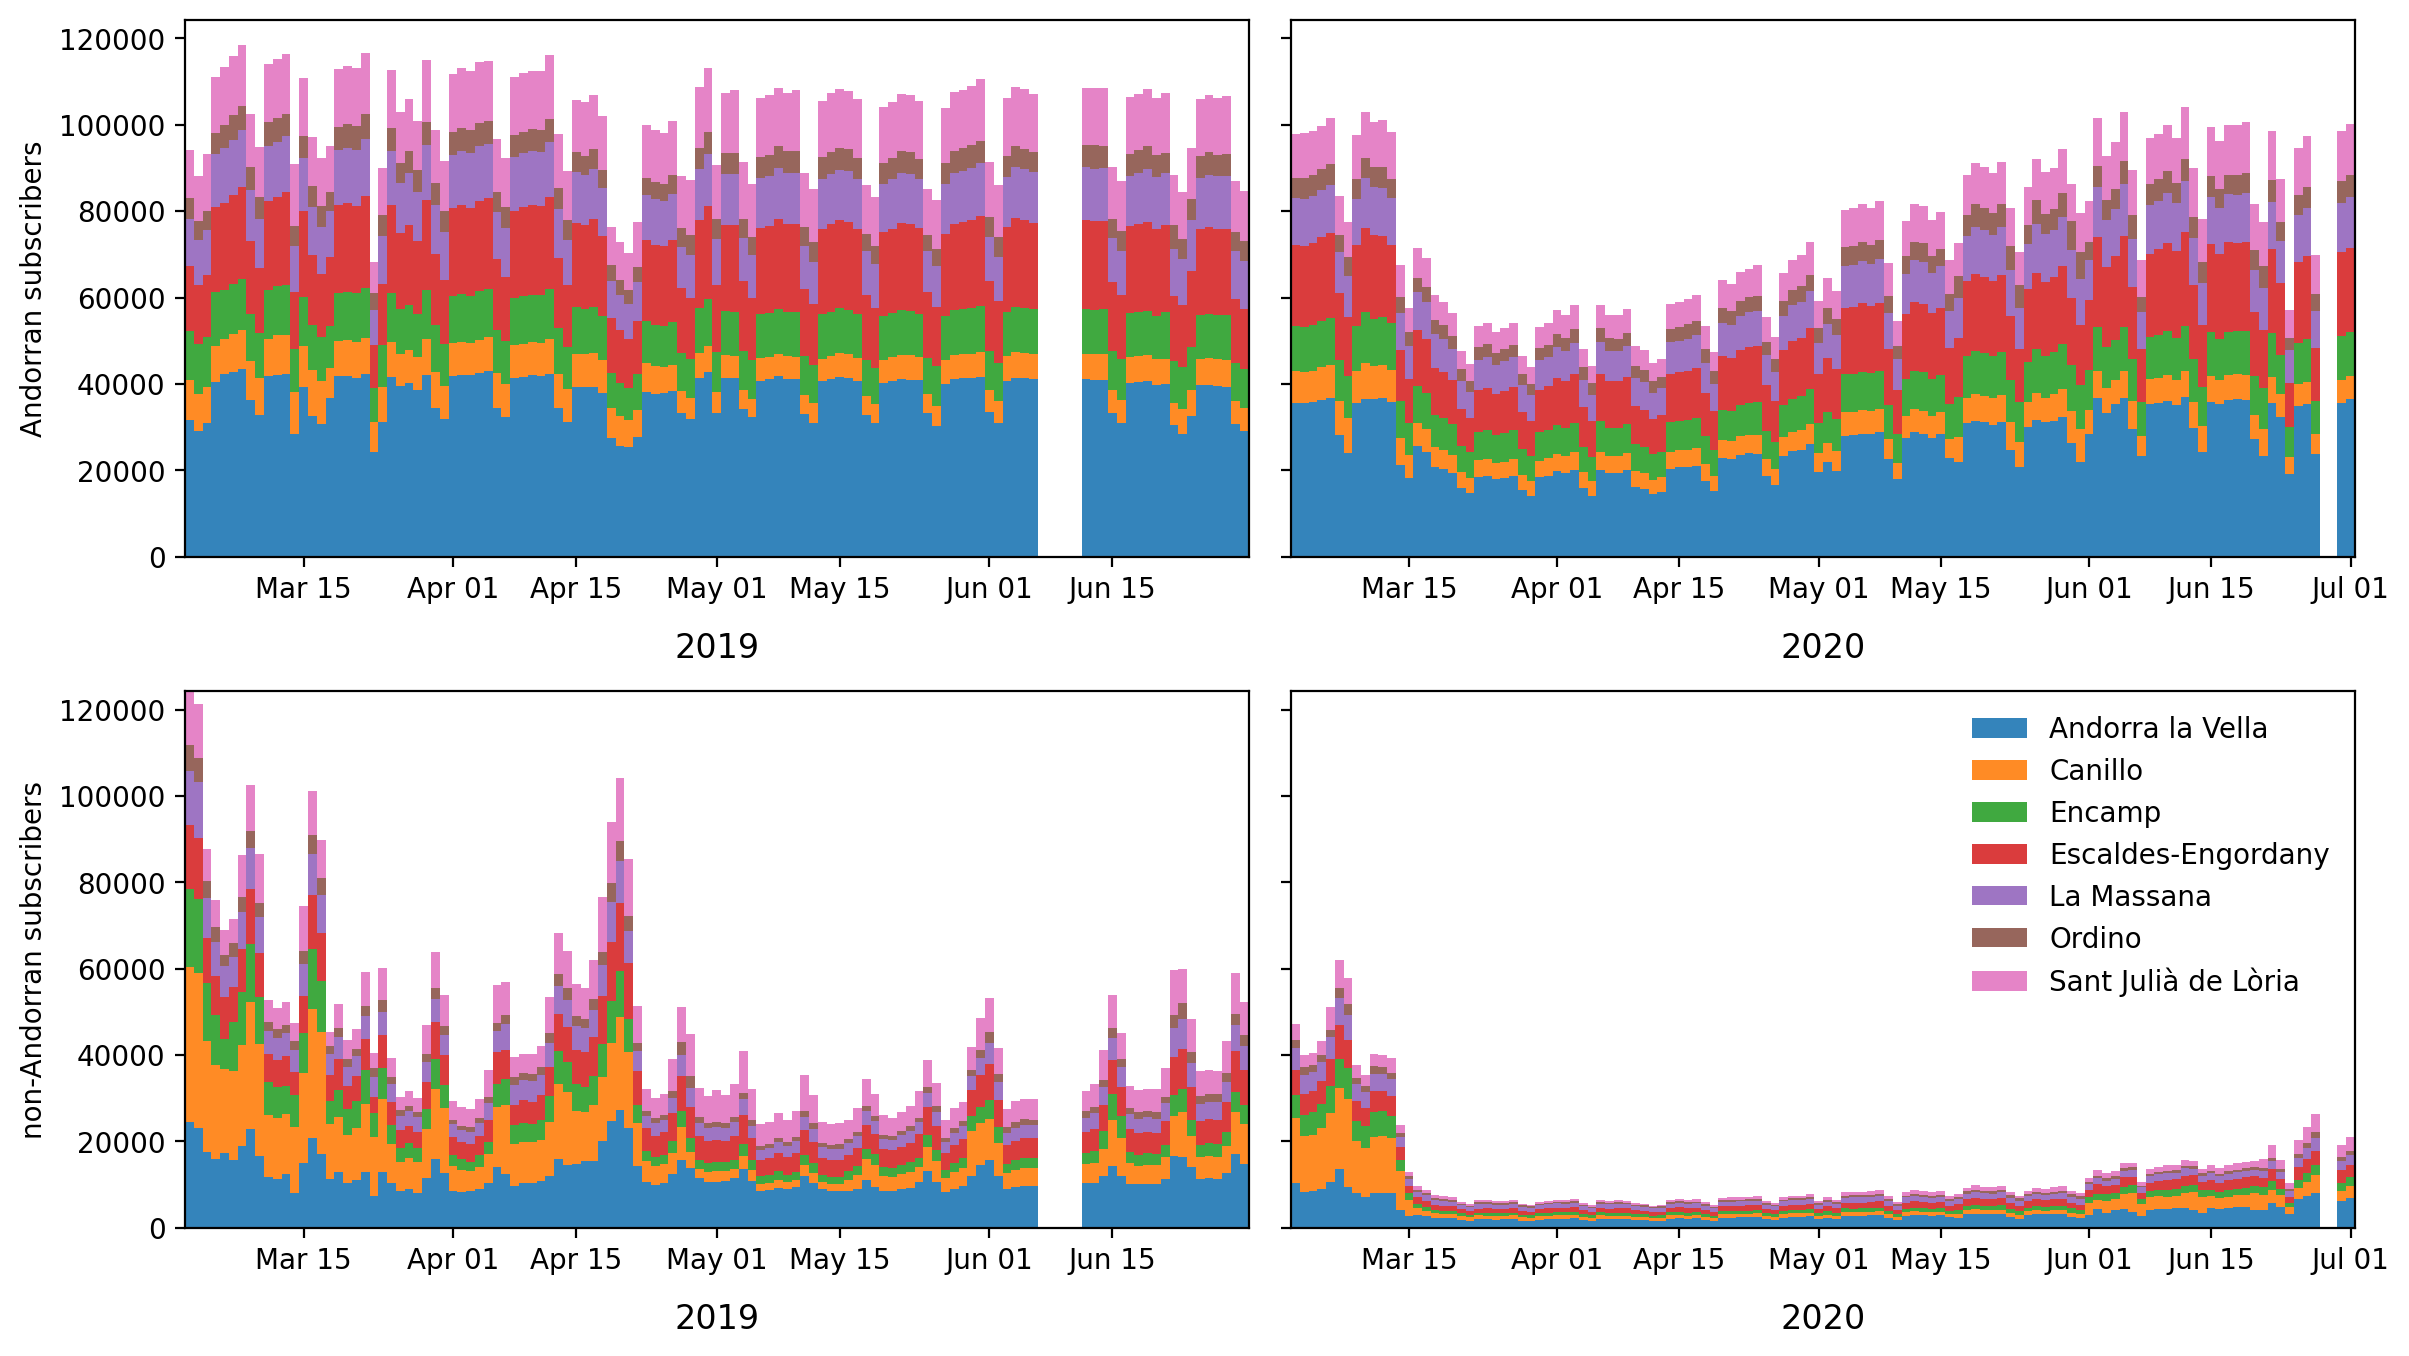

In [291]:
# Make 2x2 plot with 
# 1st row: 2019 Andorran,    2020 Andorran
# 2nd row: 2019 Non-Andorran,2020 Non-Andorran 

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*4), dpi=100,
                         sharey=True)
plt.subplots_adjust(hspace=0.25, wspace=0.04)

plots = {
    0: [parish_users_2019_df, 2019, ANDORRAN_MCC, ANDORRAN, dates_2019],
    1: [parish_users_2020_df, 2020, ANDORRAN_MCC, ANDORRAN, dates],
    2: [parish_users_2019_df, 2019, NON_ANDORRAN, NON_ANDORRAN, dates_2019],
    3: [parish_users_2020_df, 2020, NON_ANDORRAN, NON_ANDORRAN, dates],
}

for (i, [df, year, mcc, name, datetimes]) in plots.items():
    mcc_df = df[df[MCC]==mcc]
    ax = axes.flat[i]
    bottom = None
    for parish in parishes:
        p_df = mcc_df[mcc_df[PARISH_NAME]==parish]
        p_df = p_df.set_index(DATE)
        users = p_df[USER_COUNT]
        ax.bar(p_df.index,
               users, 
               1, 
               label='%s'%parish,
               alpha=0.9,
               bottom=bottom,
               color=parish_cmap[parish],
              )
        if bottom is  None:
            bottom = np.array(users)
        else:
            bottom += np.array(users)
    # Label x and y axes
    # if name == ANDORRAN:
    if i == 0:
        ax.set_ylabel('Andorran subscribers')
    #elif name == NON_ANDORRAN:
    elif i == 2:
        ax.set_ylabel('non-Andorran subscribers')
    
    if year == 2019:
        ax.set_xlabel('2019', fontsize=12, labelpad=10)
    elif year == 2020:
        ax.set_xlabel('2020', fontsize=12, labelpad=10)  
    # ax.set_title('%s Daily subscribers reporting stays in parishes: %s' % (year, name))
    ax.margins(0)
    plt.setp(ax.spines.values(), color=COLOR)
    ax.xaxis.set_major_formatter(myFmt)
    # ax.set_xlim(datetimes[0], datetimes[-1])
plt.legend(facecolor=COLOR, framealpha=0)
plt.show()

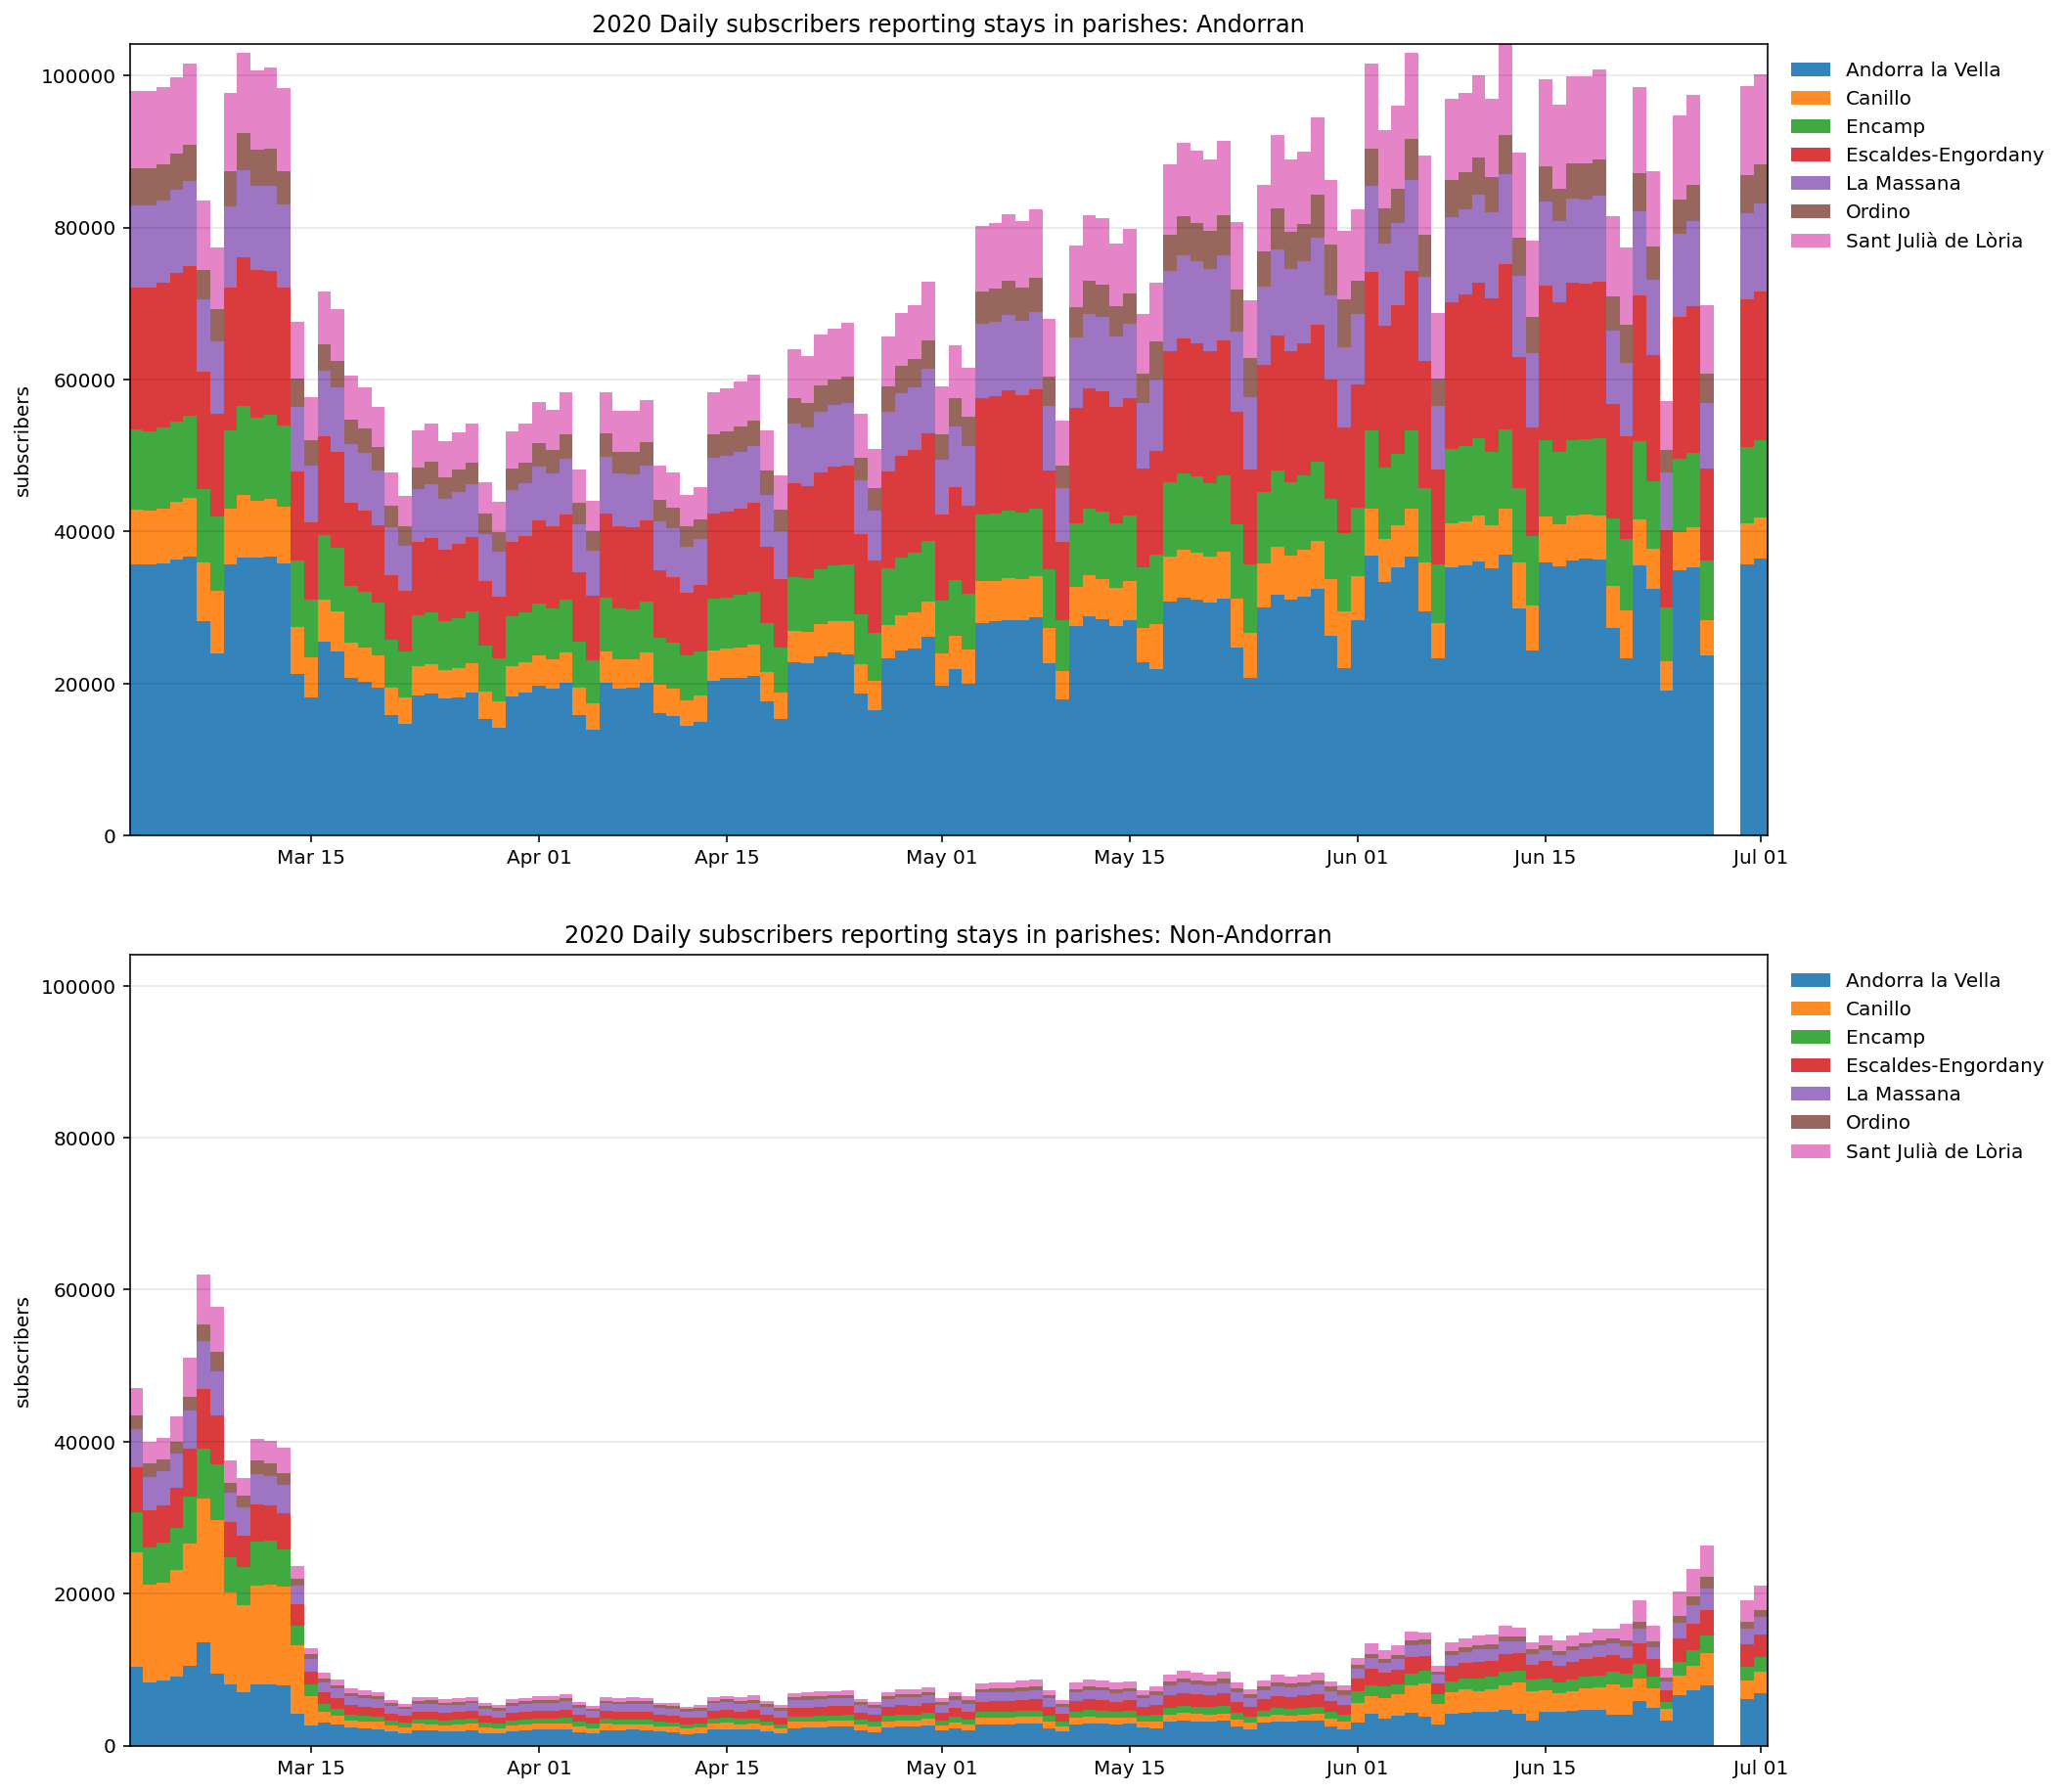

In [288]:
COLOR='black'
set_colors(COLOR)
mcc_andorran_non_andorran_dict = {ANDORRAN_MCC: 'Andorran', NON_ANDORRAN: NON_ANDORRAN}
plot_parish_mcc(parish_users_2020_df, mcc_andorran_non_andorran_dict, 2020, legend=True)
plt.show()

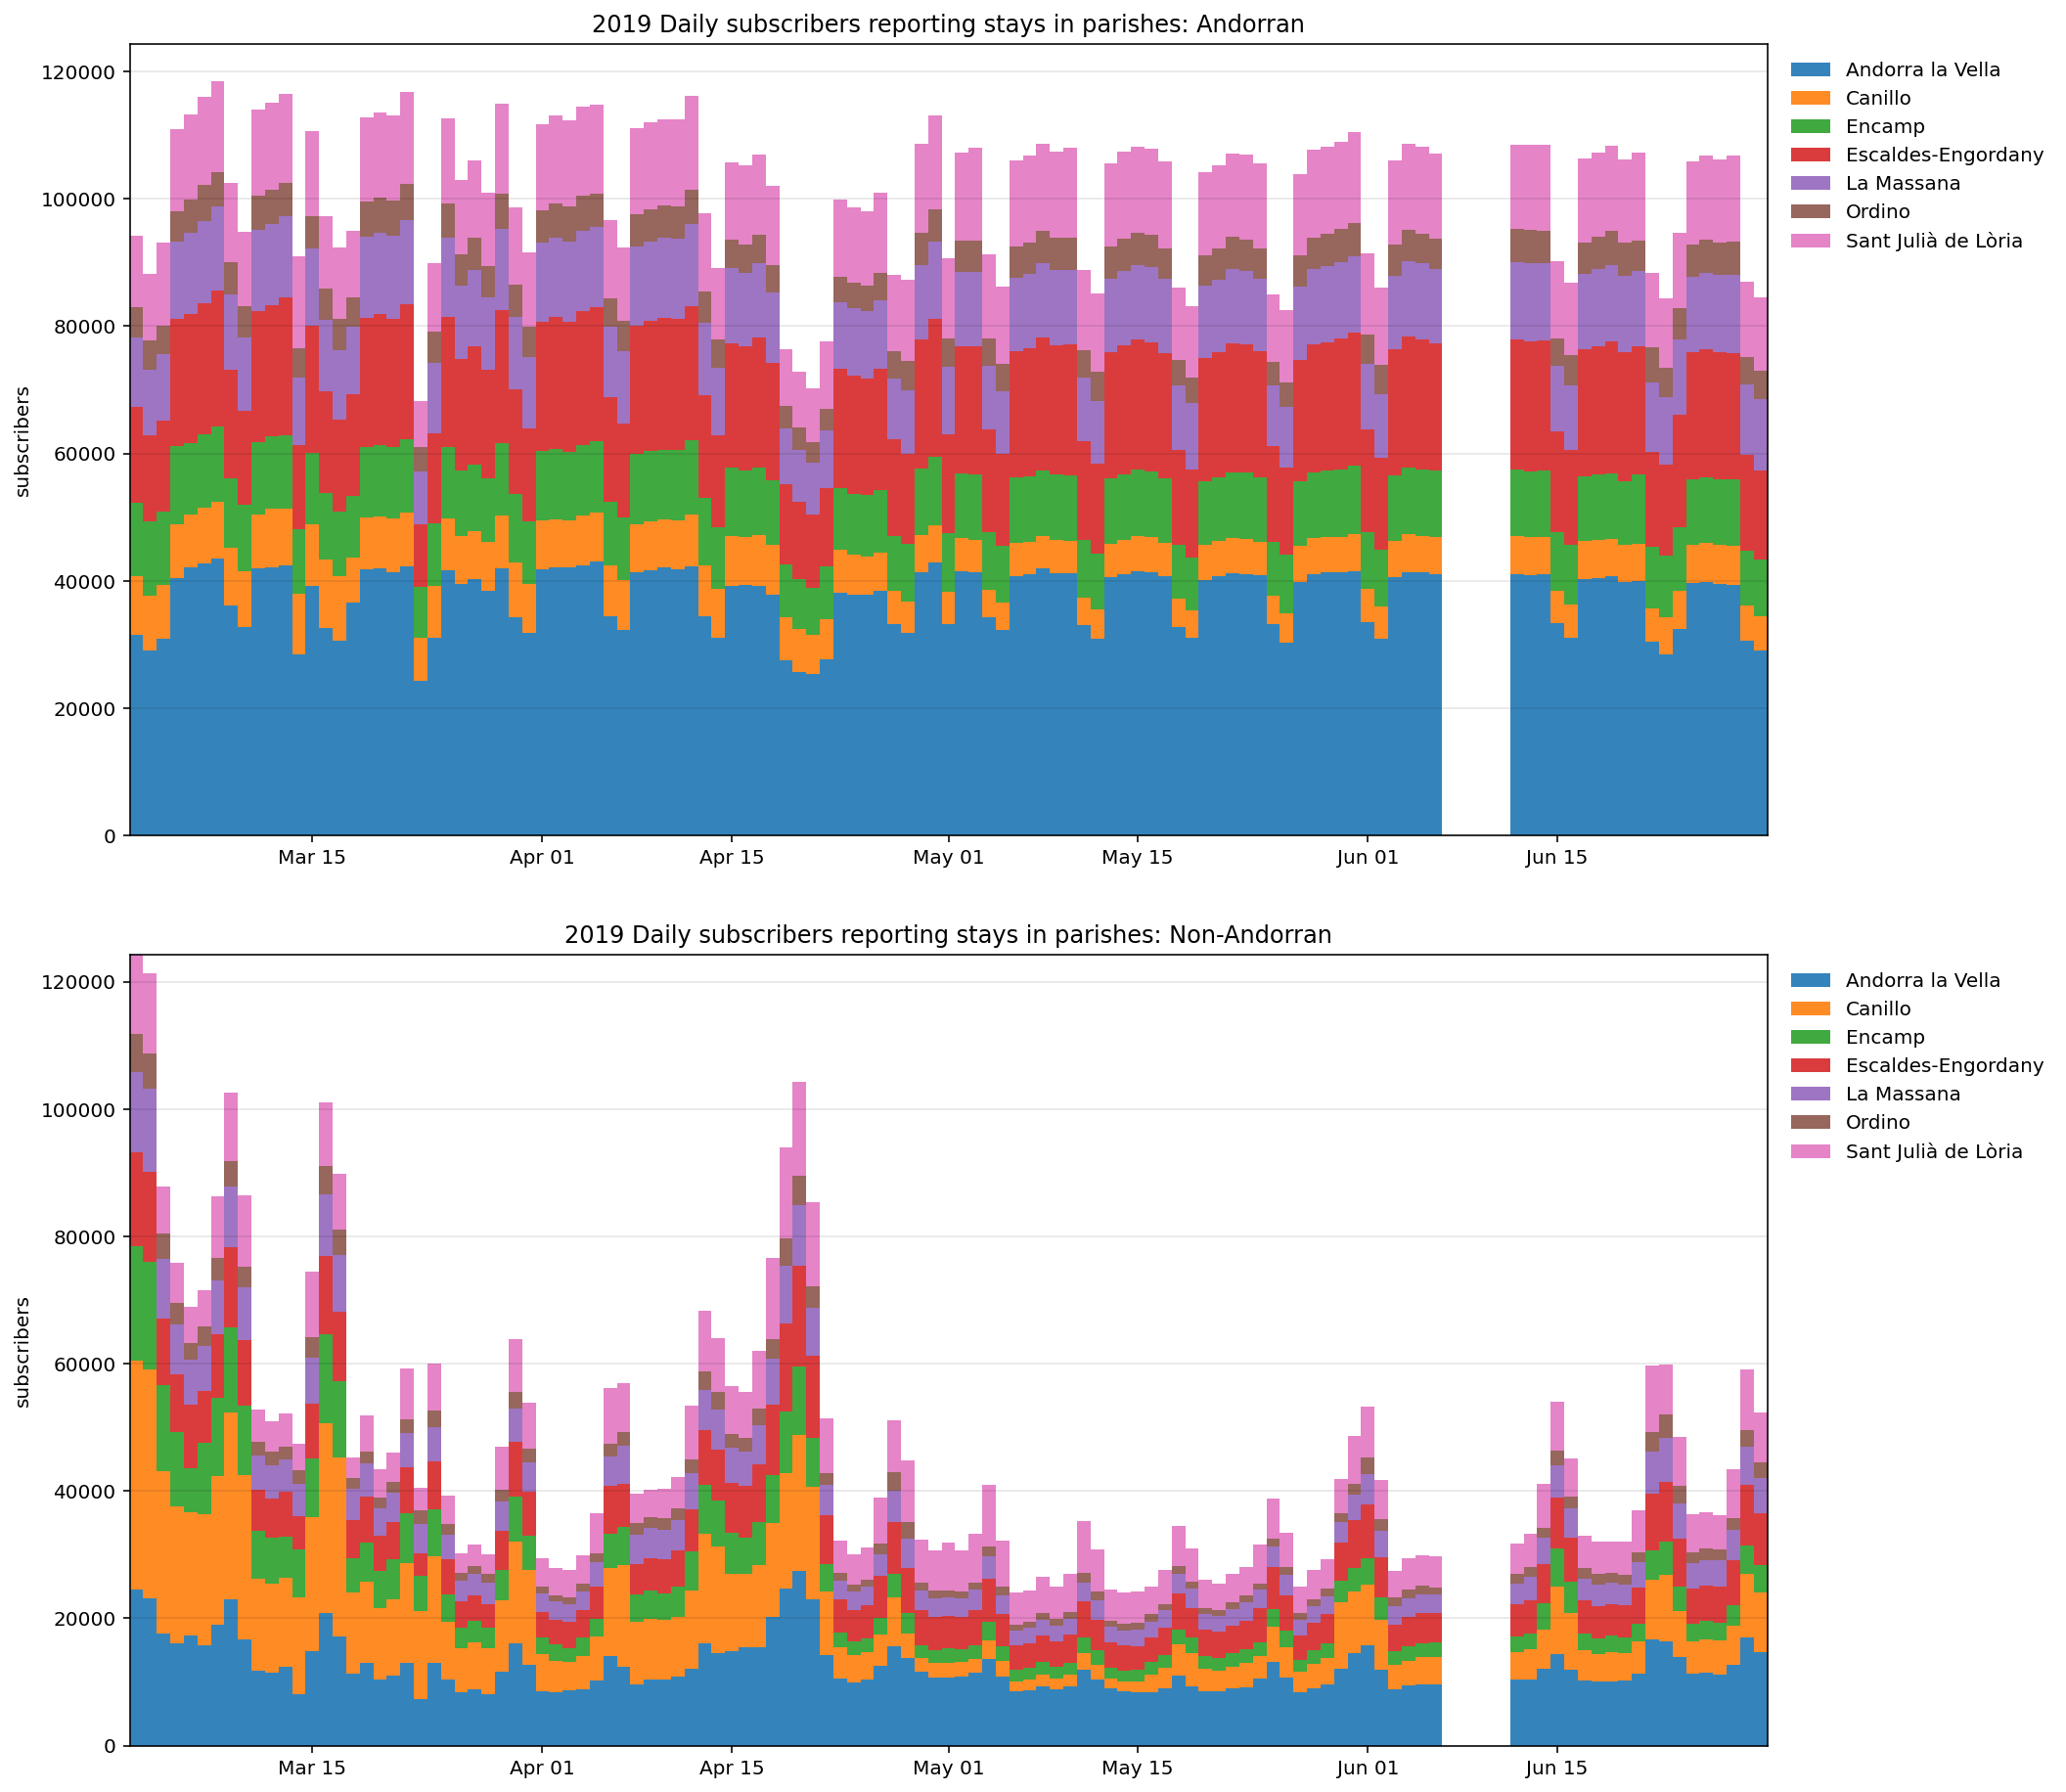

In [260]:
COLOR='black'
set_colors(COLOR)
mcc_andorran_non_andorran_dict = {ANDORRAN_MCC: 'Andorran', NON_ANDORRAN: NON_ANDORRAN}
plot_parish_mcc(parish_users_2019_df, mcc_andorran_non_andorran_dict, 2019)
plt.show()

Plot more nationalities

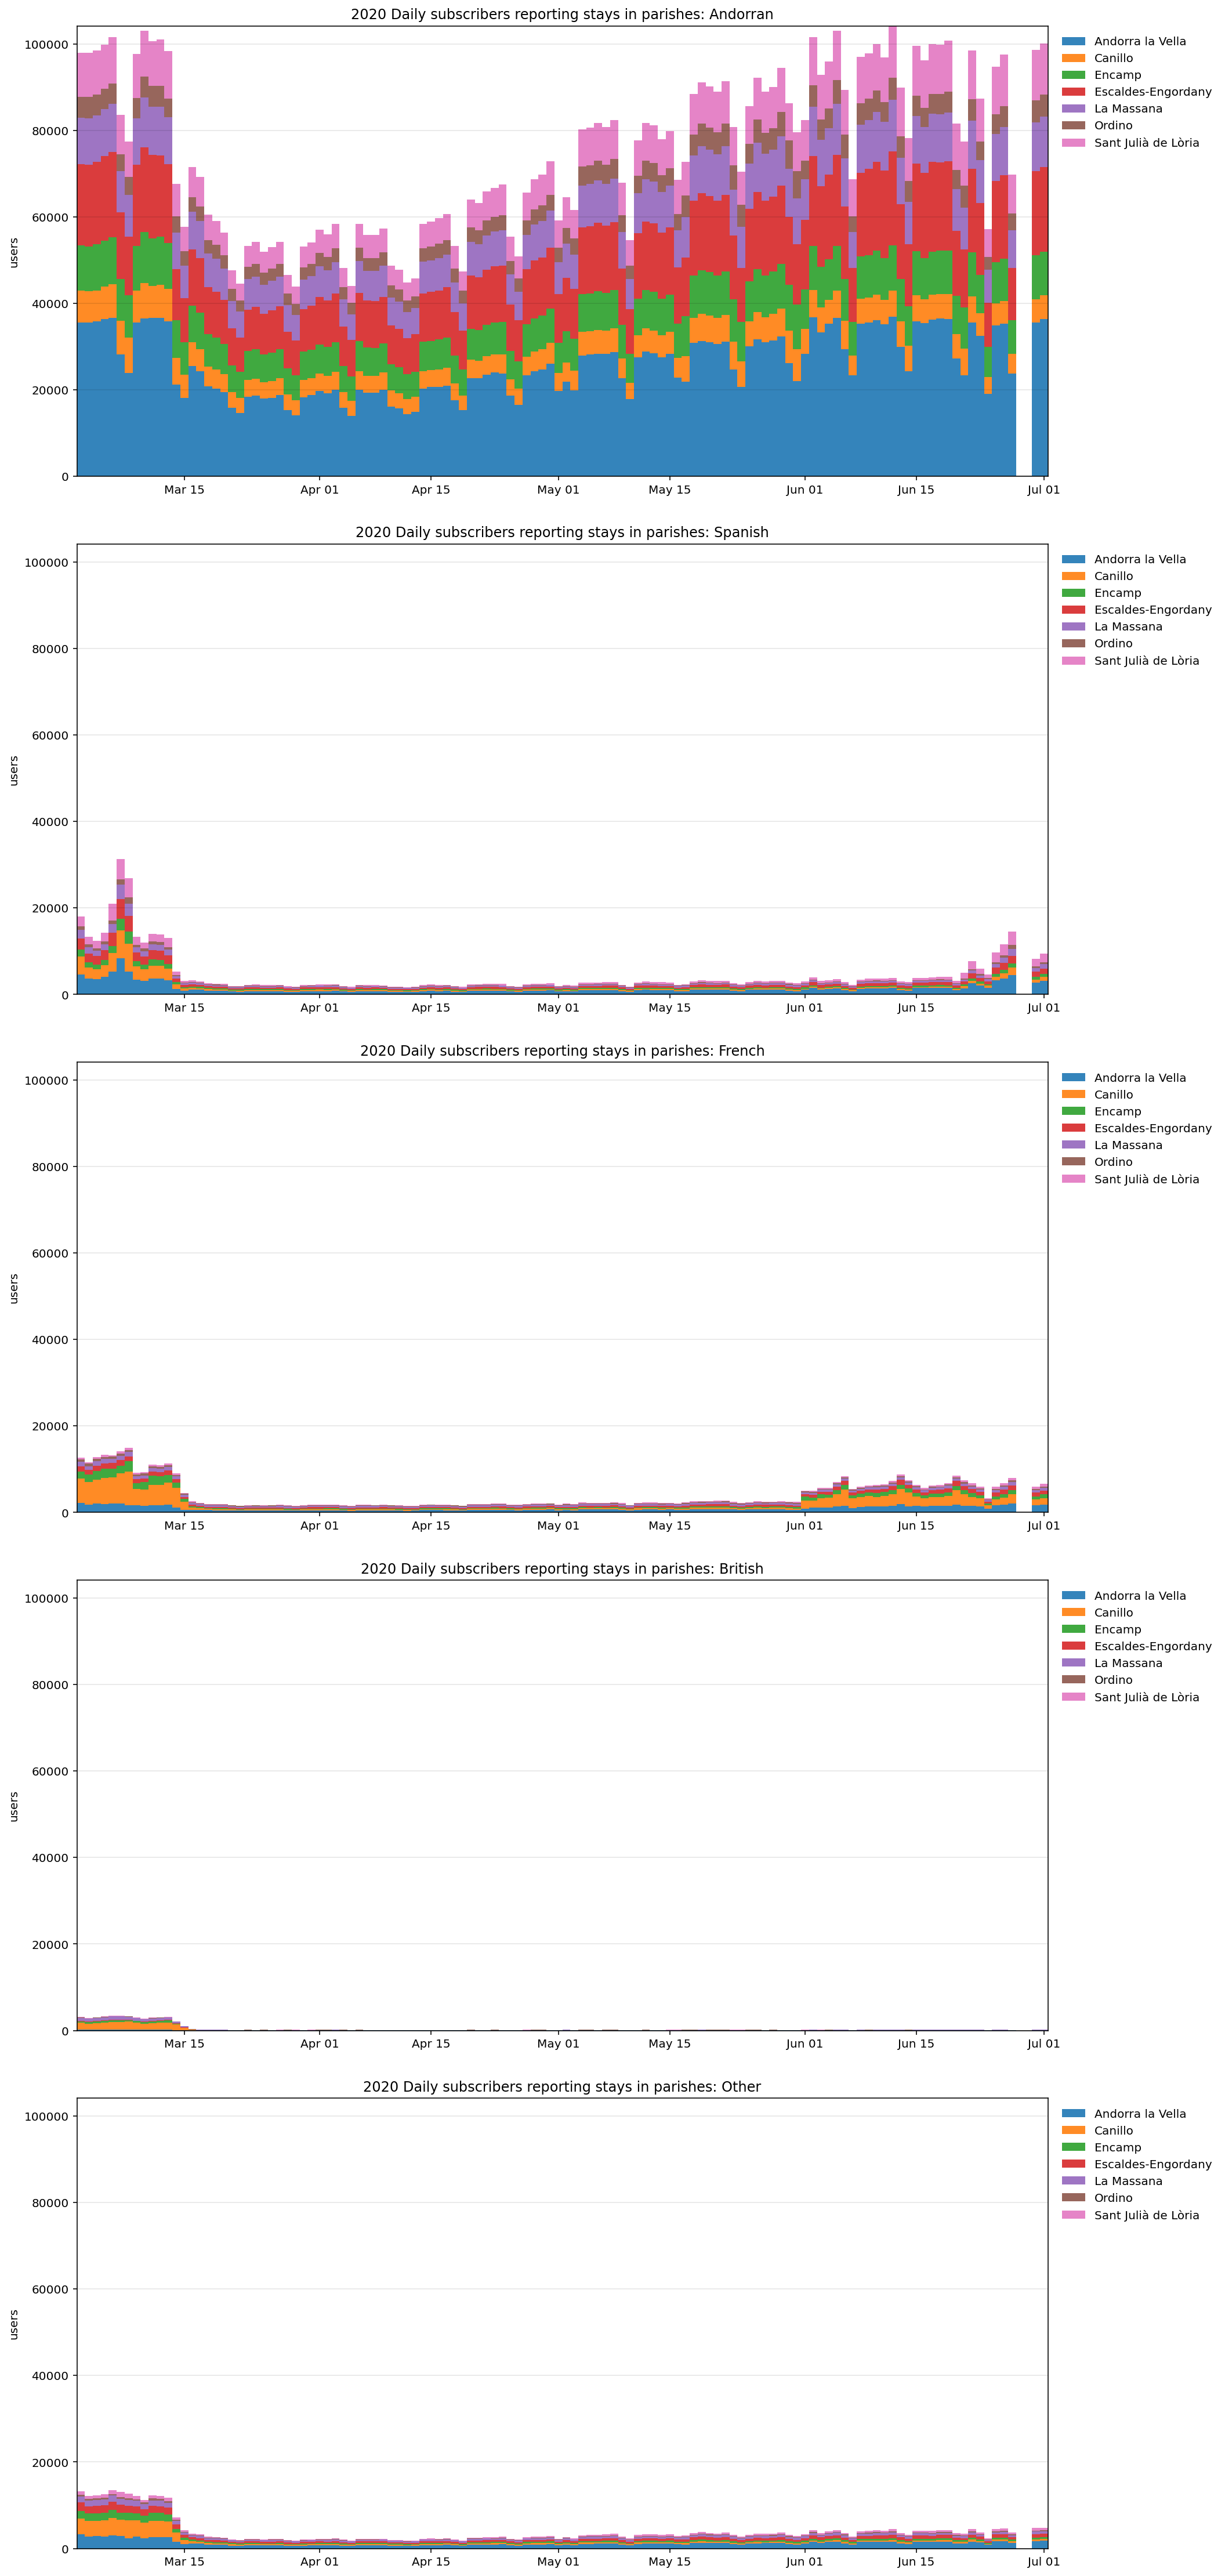

In [223]:
_ = plot_parish_mcc(parish_users_2020_df, mcc_names_dict, 2020)

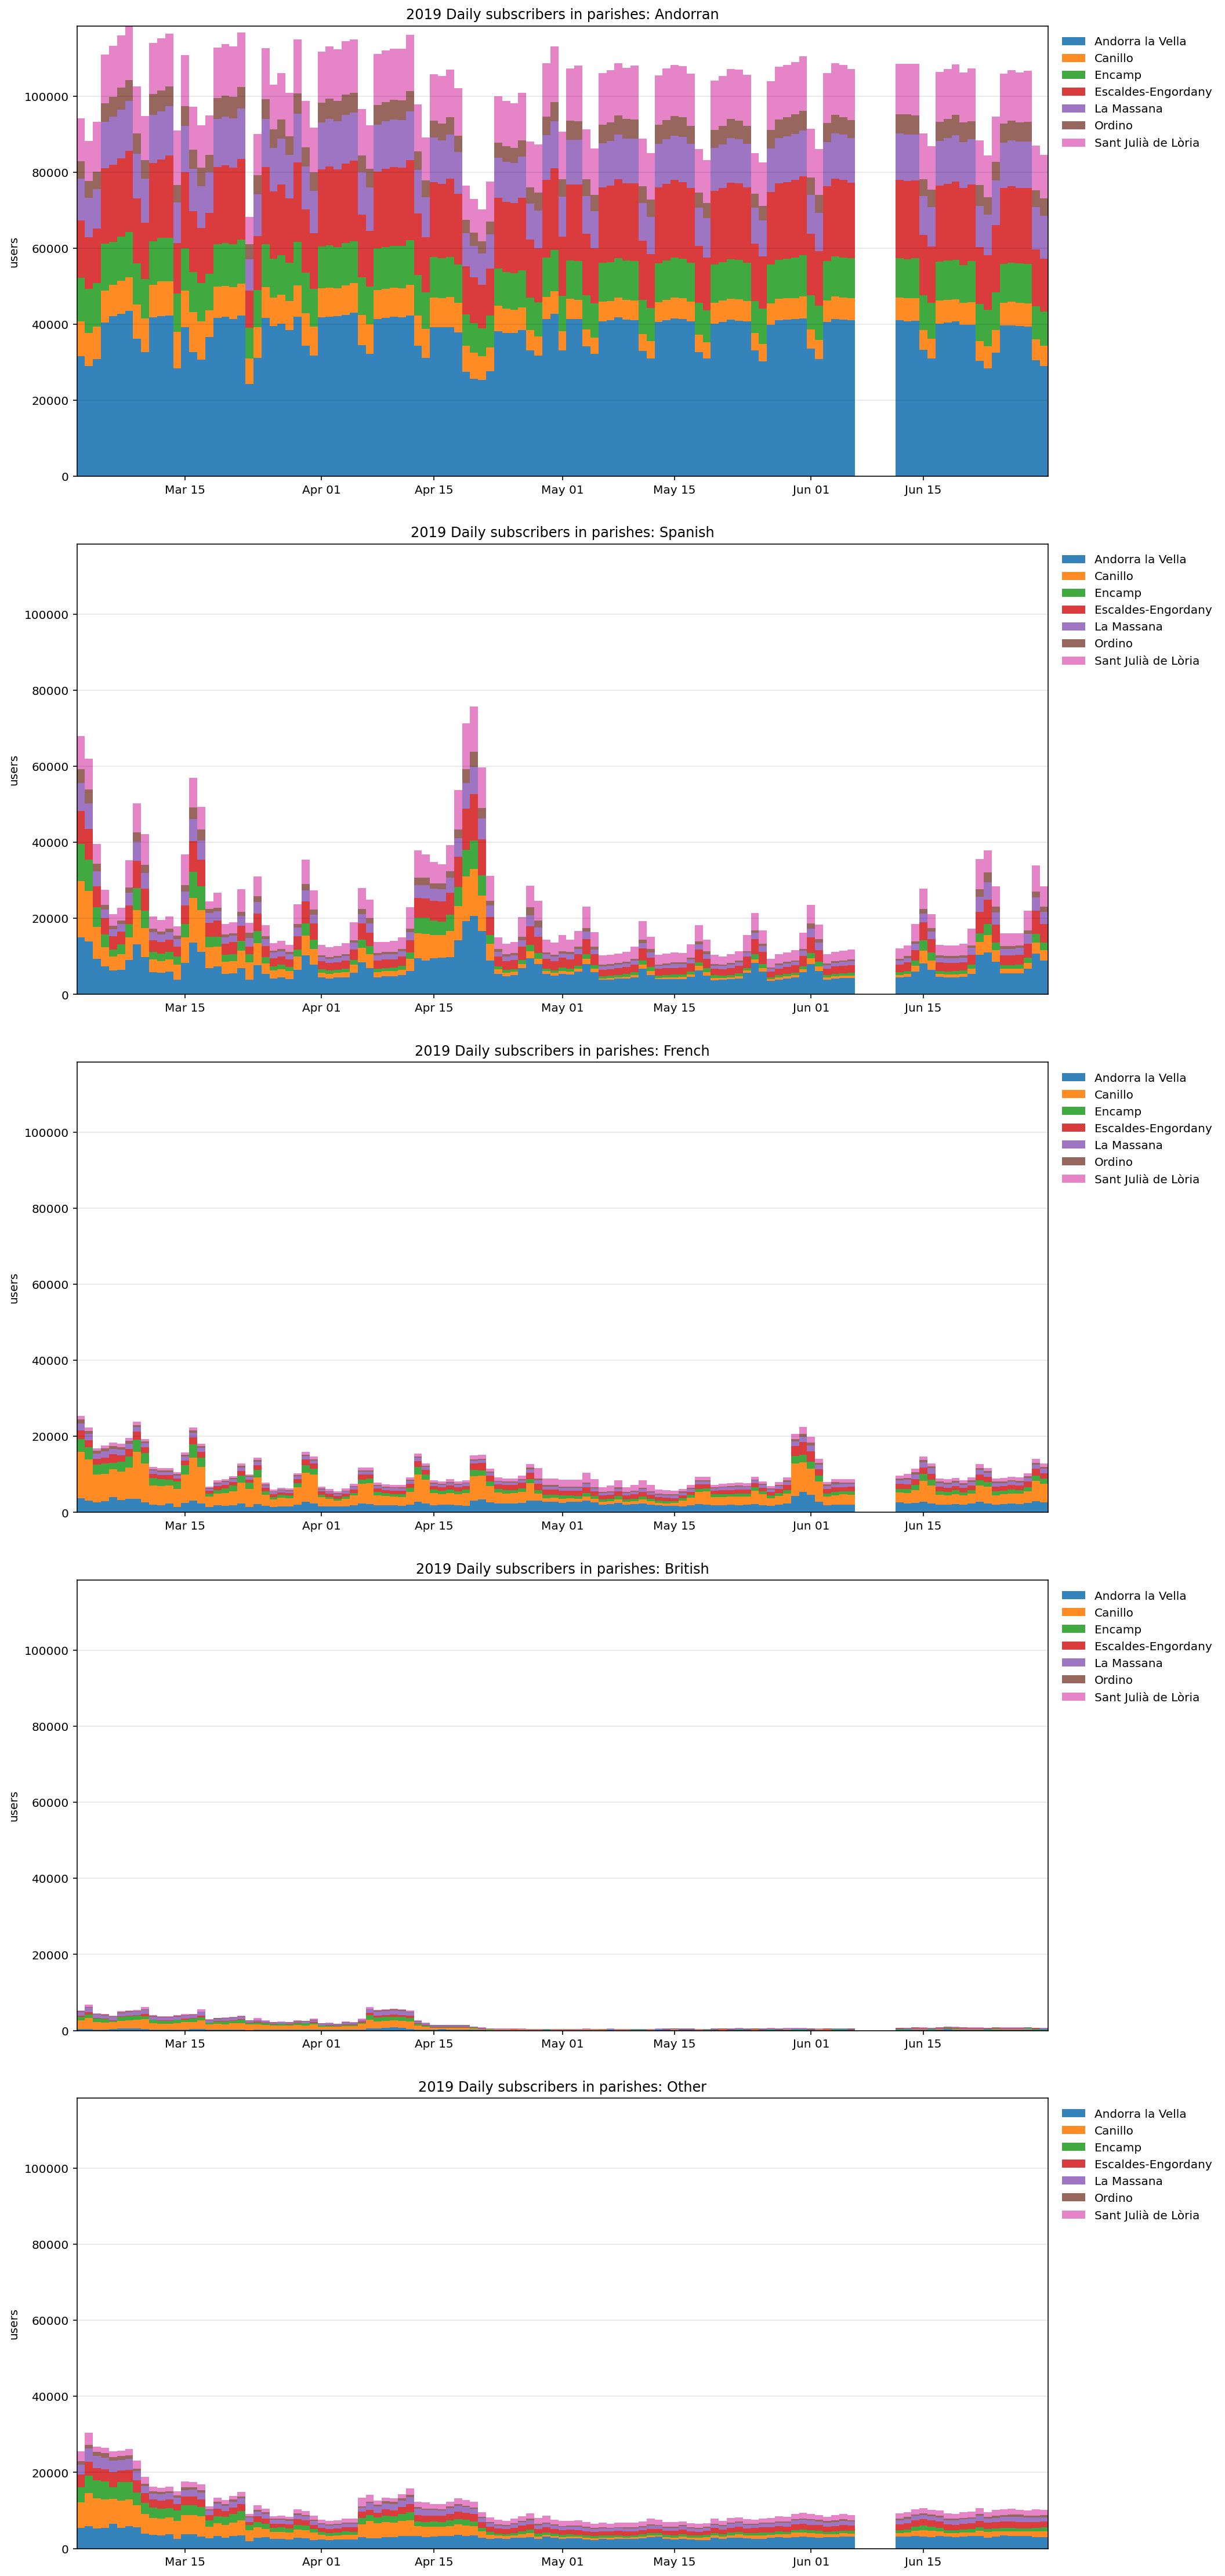

In [216]:
_ = plot_parish_mcc(parish_users_2019_df, mcc_names_dict, 2019)

## Compare all users for 2019 vs 2020

In [217]:
all_parish_users_2019_df = parish_users_2019_df[
    (parish_users_2019_df[MCC]==ALL_MCC)
][[DATE, USER_COUNT, PARISH_NAME]]#.set_index([DATE, PARISH_NAME])

all_parish_users_2020_df = parish_users_2020_df[
    (parish_users_2020_df[MCC]==ALL_MCC)
][[DATE, USER_COUNT, PARISH_NAME]]#.set_index([DATE, PARISH_NAME])

all_parish_users_2020_df.head()

,date,users,parish
0,2020-03-02,46028,Andorra la Vella
7,2020-03-02,22328,Canillo
14,2020-03-02,15754,Encamp
21,2020-03-02,24629,Escaldes-Engordany
28,2020-03-02,15917,La Massana


In [218]:
df = all_parish_users_2019_df
p_df = df[df[PARISH_NAME]=='Canillo']
p_df = p_df.set_index(DATE)

p_df.head()

,users,parish
date,,
2019-03-02,45081,Canillo
2019-03-03,44456,Canillo
2019-03-04,34076,Canillo
2019-03-05,30053,Canillo
2019-03-06,27572,Canillo


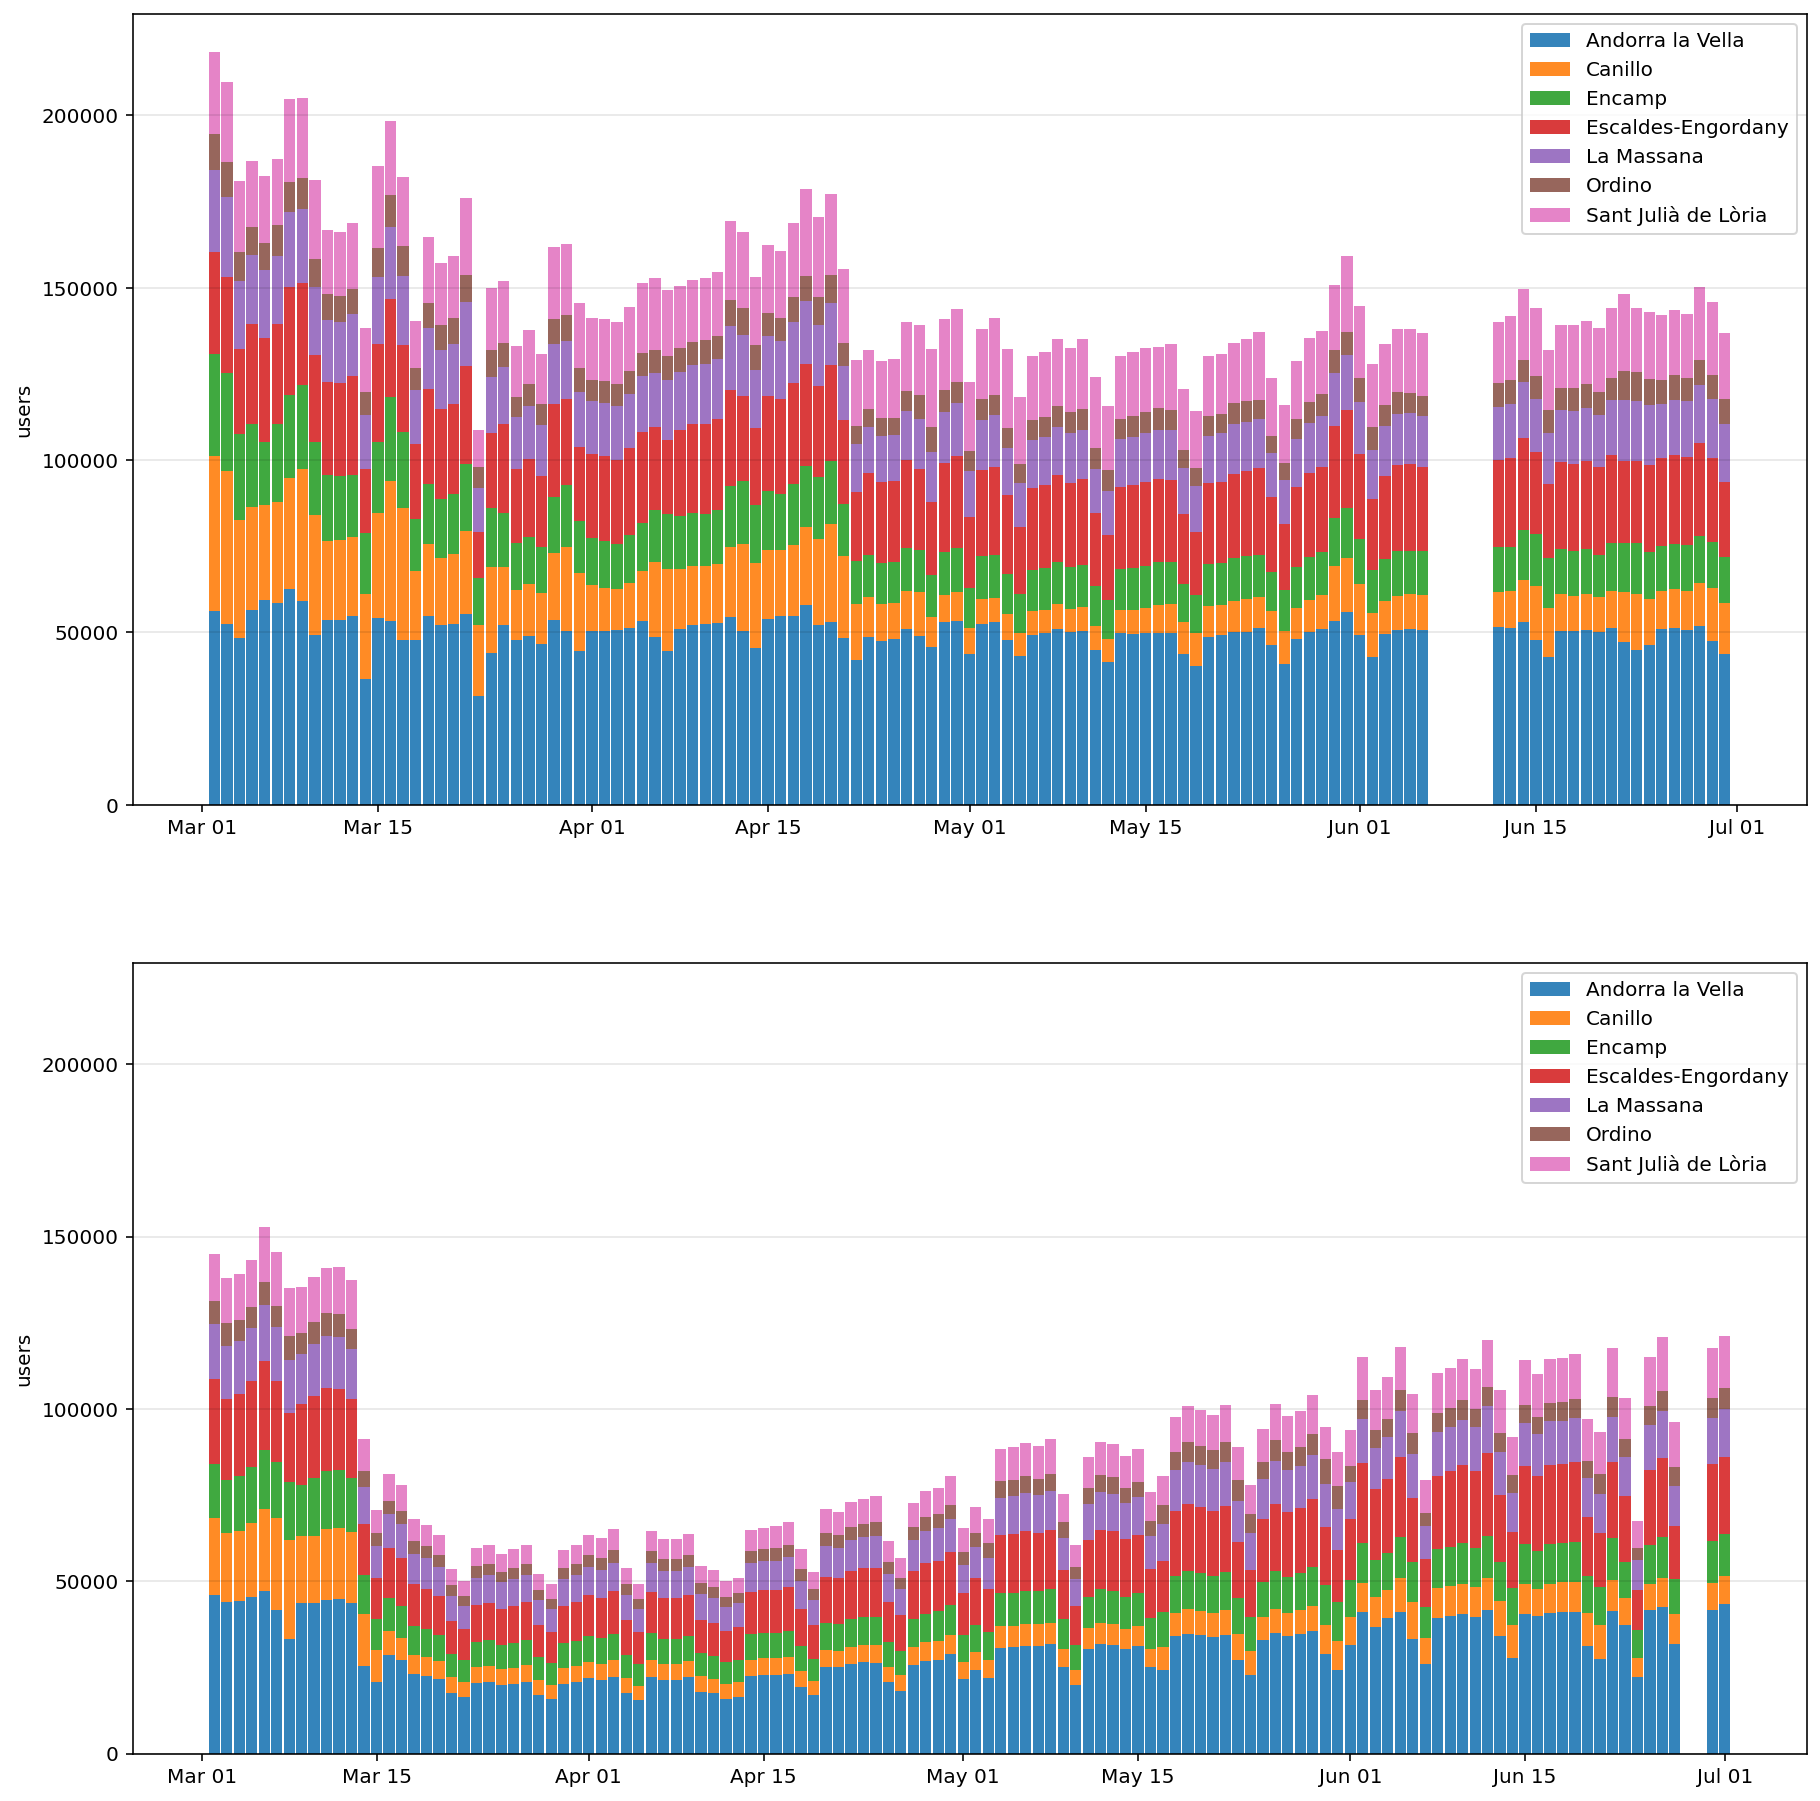

In [219]:
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharey=True)

ax2019, ax2020 = axes[0], axes[1]


for ax, df in zip([ax2019, ax2020], [all_parish_users_2019_df, all_parish_users_2020_df]):
    bottom = None
    for parish in parishes:
        p_df = df[df[PARISH_NAME]==parish]
        p_df = p_df.set_index(DATE)
        users = p_df[USER_COUNT]
        ax.bar(p_df.index,
               users, 
               0.9, 
               label='%s'%parish,
               alpha=0.9,
               bottom=bottom,
               color=parish_cmap[parish],
              )
        if bottom is  None:
            bottom = np.array(users)
        else:
            bottom += np.array(users)
    ax.set_ylabel('users')
    ax.legend()
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.xaxis.set_major_formatter(myFmt)